In [15]:
import pandas as pd 
import matplotlib.pyplot as plt 
import os 
import sys
from tqdm import tqdm
sys.path.insert(0, os.getcwd() + '/code')
from viz import *
from helper_functions import * 

In [2]:
df_game = pd.read_csv("data/games.csv")
df_tracking = pd.read_csv("data/week1.csv")
df_tracking = compute_orientation(df_tracking)
df_play = pd.read_csv("data/plays.csv")
df_players = pd.read_csv("data/players.csv")
df_pffScoutingData = pd.read_csv("data/pffScoutingData.csv")

In [13]:
print(df_play.dropBackType.unique())

['TRADITIONAL' 'SCRAMBLE_ROLLOUT_RIGHT' 'DESIGNED_ROLLOUT_RIGHT' nan
 'SCRAMBLE' 'DESIGNED_ROLLOUT_LEFT' 'UNKNOWN' 'DESIGNED_RUN'
 'SCRAMBLE_ROLLOUT_LEFT']


In [28]:
gameId = 2021090900
playId = 97
selected_play_df = df_play[(df_play.playId==playId)&(df_play.gameId==gameId)].copy()    
tracking_players_df = pd.merge(df_tracking,df_players,how="left",on = "nflId")
tracking_players_df = pd.merge(tracking_players_df,df_pffScoutingData,how="left",on = ["nflId","playId","gameId"])
selected_tracking_df = tracking_players_df[(tracking_players_df.playId==playId)&(tracking_players_df.gameId==gameId)].copy()

print(selected_tracking_df.columns)
print(selected_tracking_df[["displayName","frameId","x","y","dis"]])

Index(['gameId', 'playId', 'nflId', 'frameId', 'time', 'jerseyNumber', 'team',
       'playDirection', 'x', 'y', 's', 'a', 'dis', 'o', 'dir', 'event', 'o_x',
       'o_y', 'height', 'weight', 'birthDate', 'collegeName',
       'officialPosition', 'displayName', 'pff_role', 'pff_positionLinedUp',
       'pff_hit', 'pff_hurry', 'pff_sack', 'pff_beatenByDefender',
       'pff_hitAllowed', 'pff_hurryAllowed', 'pff_sackAllowed',
       'pff_nflIdBlockedPlayer', 'pff_blockType', 'pff_backFieldBlock'],
      dtype='object')
    displayName  frameId      x      y   dis
0     Tom Brady        1  37.77  24.22  0.03
1     Tom Brady        2  37.78  24.22  0.02
2     Tom Brady        3  37.78  24.24  0.01
3     Tom Brady        4  37.73  24.25  0.06
4     Tom Brady        5  37.69  24.26  0.04
..          ...      ...    ...    ...   ...
984         NaN       39  33.25  21.79  0.10
985         NaN       40  36.55  19.21  4.19
986         NaN       41  37.77  18.49  1.42
987         NaN       42  3

In [29]:
animate_play(df_tracking,df_play,df_players,df_pffScoutingData,2021090900, 2330, displayZone=True, displayOrientations=True).show()

35454.0
38588.0
40074.0
41338.0
41915.0
46081.0
46132.0
47788.0
47877.0
47882.0
52453.0
37082.0
42347.0
42654.0
43293.0
43424.0
46119.0
46150.0
46206.0
46277.0
47873.0
52554.0
35454.0
38588.0
40074.0
41338.0
41915.0
46081.0
46132.0
47788.0
47877.0
47882.0
52453.0
37082.0
42347.0
42654.0
43293.0
43424.0
46119.0
46150.0
46206.0
46277.0
47873.0
52554.0
35454.0
38588.0
40074.0
41338.0
41915.0
46081.0
46132.0
47788.0
47877.0
47882.0
52453.0
37082.0
42347.0
42654.0
43293.0
43424.0
46119.0
46150.0
46206.0
46277.0
47873.0
52554.0
35454.0
38588.0
40074.0
41338.0
41915.0
46081.0
46132.0
47788.0
47877.0
47882.0
52453.0
37082.0
42347.0
42654.0
43293.0
43424.0
46119.0
46150.0
46206.0
46277.0
47873.0
52554.0
35454.0
38588.0
40074.0
41338.0
41915.0
46081.0
46132.0
47788.0
47877.0
47882.0
52453.0
37082.0
42347.0
42654.0
43293.0
43424.0
46119.0
46150.0
46206.0
46277.0
47873.0
52554.0
35454.0
38588.0
40074.0
41338.0
41915.0
46081.0
46132.0
47788.0
47877.0
47882.0
52453.0
37082.0
42347.0
42654.0
43293.0


 PlayId : 97 - (13:33) (Shotgun) T.Brady pass incomplete deep right to C.Godwin.


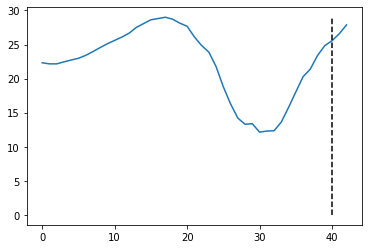

 PlayId : 137 - (13:18) (Shotgun) D.Prescott pass deep left to A.Cooper pushed ob at DAL 30 for 28 yards (A.Winfield).


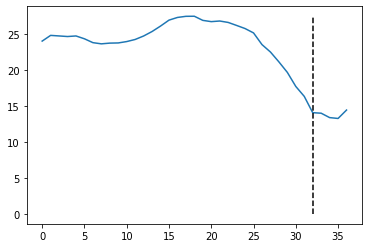

 PlayId : 187 - (12:23) (Shotgun) D.Prescott pass short middle to D.Schultz to DAL 39 for 5 yards (D.White).


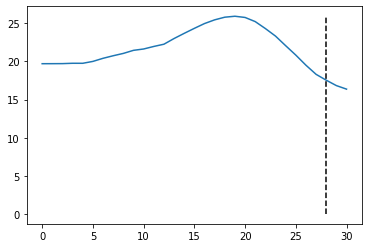

 PlayId : 282 - (9:56) D.Prescott pass incomplete deep left to C.Lamb.


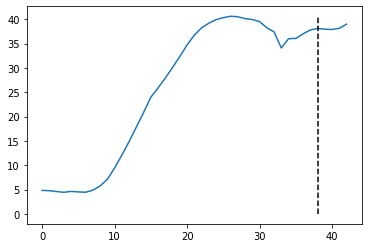

 PlayId : 349 - (9:46) (Shotgun) D.Prescott pass incomplete short left to C.Lamb [L.David].


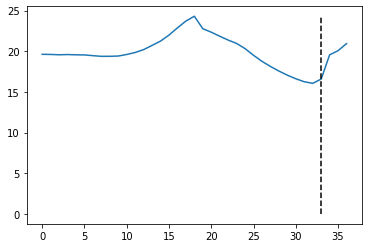

In [9]:
gameId = 2021090900
playId = 97

playIds = df_play[df_play.gameId==gameId].playId.unique()
playIds.sort()
for playId in playIds[:5]:
    selected_play_df = df_play[(df_play.playId==playId)&(df_play.gameId==gameId)].copy()    
    tracking_players_df = pd.merge(df_tracking,df_players,how="left",on = "nflId")
    tracking_players_df = pd.merge(tracking_players_df,df_pffScoutingData,how="left",on = ["nflId","playId","gameId"])
    selected_tracking_df = tracking_players_df[(tracking_players_df.playId==playId)&(tracking_players_df.gameId==gameId)].copy()

    sorted_frame_list = selected_tracking_df.frameId.unique()
    sorted_frame_list.sort()
    if selected_play_df.empty :
        print(playId)
        continue
    line_of_scrimmage = selected_play_df.absoluteYardlineNumber.values[0]
    playDescription = selected_play_df.playDescription.values[0]
    print(f" PlayId : {playId} - {playDescription}")
    aire_t = list()
    if 'pass_forward' in selected_tracking_df.event.unique():
        eventFrame = selected_tracking_df[selected_tracking_df.event == 'pass_forward'].iloc[0].frameId
    else :
        eventFrame = 1000
    for frameId in sorted_frame_list:
        #if eventFrame == frameId :
        #    break
        selected_frame_df = selected_tracking_df[selected_tracking_df.frameId == frameId]
        offensive_points = get_Oline_position(selected_frame_df)
        defensive_points = get_Dline_position(selected_frame_df)
        QB_zone = calculate_Oline_zones(offensive_points, line_of_scrimmage)
        region_polys, region_pts, players_points = calculate_voronoi_zones(QB_zone, offensive_points, defensive_points)
        aire_t.append(pocketArea(region_polys, region_pts, players_points))

    plt.plot(aire_t)
    plt.vlines(eventFrame, 0, np.max(aire_t), color = 'black', linestyles='--',)
    plt.show()
    

  0%|          | 0/97 [00:00<?, ?it/s]

 PlayId : 2279 - (1:11) (Shotgun) D.Prescott sacked at TB 33 for -12 yards (S.Barrett).


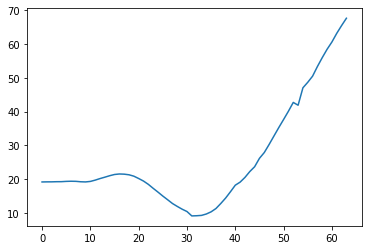

 45%|████▌     | 44/97 [00:06<00:07,  6.89it/s]

 PlayId : 2330 - (:28) (Shotgun) D.Prescott scrambles left end pushed ob at TB 42 for 1 yard (S.Barrett; W.Gholston). TB-W.Gholston was injured during the play. His return is Questionable. 


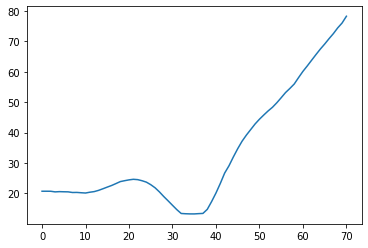

 47%|████▋     | 46/97 [00:13<00:17,  2.84it/s]

 PlayId : 3364 - (2:03) (Shotgun) D.Prescott scrambles up the middle to TB 25 for 2 yards (D.White).


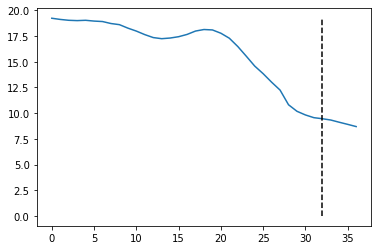

100%|██████████| 97/97 [00:17<00:00,  5.46it/s]


In [19]:
gameId = 2021090900
playId = 97

playIds = df_play[df_play.gameId==gameId].playId.unique()
playIds.sort()
for playId in tqdm(playIds):
    selected_play_df = df_play[(df_play.playId==playId)&(df_play.gameId==gameId)].copy()  
    if 'SCRAMBLE' in selected_play_df.dropBackType.unique():  
        tracking_players_df = pd.merge(df_tracking,df_players,how="left",on = "nflId")
        tracking_players_df = pd.merge(tracking_players_df,df_pffScoutingData,how="left",on = ["nflId","playId","gameId"])
        selected_tracking_df = tracking_players_df[(tracking_players_df.playId==playId)&(tracking_players_df.gameId==gameId)].copy()

        sorted_frame_list = selected_tracking_df.frameId.unique()
        sorted_frame_list.sort()
        if selected_play_df.empty :
            print(playId)
            continue
        line_of_scrimmage = selected_play_df.absoluteYardlineNumber.values[0]
        playDescription = selected_play_df.playDescription.values[0]
        print(f" PlayId : {playId} - {playDescription}")
        aire_t = list()

        for frameId in sorted_frame_list:
            #if eventFrame == frameId :
            #    break
            selected_frame_df = selected_tracking_df[selected_tracking_df.frameId == frameId]
            offensive_points = get_Oline_position(selected_frame_df)
            defensive_points = get_Dline_position(selected_frame_df)
            QB_zone = calculate_Oline_zones(offensive_points, line_of_scrimmage)
            region_polys, region_pts, players_points = calculate_voronoi_zones(QB_zone, offensive_points, defensive_points)
            aire_t.append(pocketArea(region_polys, region_pts, players_points))
        
        plt.plot(aire_t)
        if 'pass_forward' in selected_tracking_df.event.unique():
            eventFrame = selected_tracking_df[selected_tracking_df.event == 'pass_forward'].iloc[0].frameId
            plt.vlines(eventFrame, 0, np.max(aire_t), color = 'black', linestyles='--',)
        else :
            eventFrame = 1000
        
        QB_dis_list =
        QB_dis_covered = 



        plt.show()
    